**Answer 1:** the total number of multiplications will be equal to $n*k*m$ and that of additions will be equal to $n*(k-1)*m$. 

Explanation:

This is because the total number of multiplications in multiply a row of the 1st matrix with the column of second matrix is 1 extra as compared to the number of additions it requires. Similarly, the rest of the rows and columns are multipled.

eg:

$$\begin{bmatrix} 1 & 2 & 3 \\ 3 & 0 & 1 \end{bmatrix} * \begin{bmatrix} 1 & 2 \\ 3 & 0 \\ 2 & 1 \end{bmatrix} = \begin{bmatrix} 1*1 + 2*3 + 3*2 & 1*2 + 2*0 + 3*1 \\ 3*1 + 0*3 + 1*2 & 3*2 + 0*0 + 1*1 \end{bmatrix} = \begin{bmatrix} 13 & 5 \\ 5 & 7 \end{bmatrix}$$ 

As it can be seen in the multiplication process, consider for the first element calculation, the number of multiplications is 3 and additions is 2. Same way, all the other elements are computed.
Since the shapes of the matrices are 2$*$3 and 3$*$2 respectively, the shape of the output matrix would be 2$*$2. Hence the number of elements would be 2$*$2 = 4. So, for each of these 4 elements, the 3 number of multiplications and 2 additions are carried over. Therefore, for this case, (2$*$2)$*$3 = 12 multiplications and (2$*$2)$*$2 additions are performed. Here, n and m are 2 and k is 3 in case of multiplication and 2 (i.e, k-1) in case of addition.

**Answer 2:**

In [ ]:
import numpy as np
import pandas as pd
import time

dt = {}

for p, j, k in zip([4,50,230],[3,40,220], [5, 60, 250]):
  time_lst = []
  time_np = []

  for i in range(500):

    arr = np.random.randint(k, size=(p,j))
    arr2 = np.random.randint(k, size=(j,k))
    lst_arr = arr.tolist()
    lst_arr2 = arr2.tolist()
    #print(arr,lst_arr)

    C = [[0 for x in range(k)] for y in range(p)]

    start = time.time()
    for i in range(p):
      for s in range(k):
        for r in range(j):
          C[i][s] = lst_arr[i][r]*lst_arr2[r][s]

    end = time.time()
    s = end-start
    time_lst.append(s)
    #print(s)

    start = time.time()
    ans = np.matmul(arr,arr2)
    end = time.time()
    s = end-start
    #print(s)
    time_np.append(s)
    #print(time_np,time_lst)

  lst = pd.DataFrame(time_lst)
  npl = pd.DataFrame(time_np)

    #print(lst.std(), npl.std(), lst.mean(), npl.mean())
  dt[p*j*k] = {
      'list_std':lst.std().values.tolist(),
      'list_mean_time': lst.mean().values.tolist(),
      'numpy_std':npl.std().values.tolist(),
      'numpy_mean_time':npl.mean().values.tolist()
  }
    
import pprint
pprint.pprint(dt)


{60: {'list_mean_time': [2.3976802825927735e-05],
      'list_std': [3.5978706082997006e-06],
      'numpy_mean_time': [2.74658203125e-06],
      'numpy_std': [4.286923901645568e-06]},
 120000: {'list_mean_time': [0.040635129928588865],
          'list_std': [0.016663683168869854],
          'numpy_mean_time': [0.00022745180130004882],
          'numpy_std': [0.0001974994978396864]},
 12650000: {'list_mean_time': [3.8610745210647583],
            'list_std': [0.35456079511090466],
            'numpy_mean_time': [0.016565050601959227],
            'numpy_std': [0.0020179276614726844]}}


It can be seen from the output dictionary that for higher dimension matrices, numpy works faster than lists(as it takes lesser time), although, it might sometimes seem a bit slower for lower dimensions.

This is because numpy combines c,cpp codes which have smaller execution time as compared to python. Also python list is a collection of different data types stored at non-contiguous memory locations. Numpy takes advantage of built-in processor intructions which make them faster linear algebraic computations. Numpy breaks down a problem into smaller parts and processes them parallely.

**Answer 3:**

In [ ]:
import time
import pandas as pd

def multi_pass(p):
  if (p.size%2 == 0):

    length = p.size//2
    max_vals = []
    for i in range(length+1):
      midx = np.argmax(p)
      max_val = p[midx]
      p = np.delete(p, midx)
      max_vals.append(max_val)
    
    ind = len(max_vals)
    med = (max_vals[ind-1]+max_vals[ind-2])/2

  else:
    length = (p.size//2)+1
    for i in range(length):
      max_val = max(p)
      p = np.delete(p, np.where(p == max_val))
    med = max_val
  return med

def func_sort(p):
  np.sort(p)
  l = p.size
  if (p.size%2 == 0):
    med = (p[l//2]+p[l//2-1])/2
  else:
    med = p[l//2]
  return med

def func_np(p):
  return np.median(p)

P = np.array([[1,2,3],[4,5,6]])
d = {}
for k, j in zip([4,50,100],[3,40,120]):
  time_lst = []
  time_srt =[]
  time_np = []
  P = np.random.randint(k, size=(k,j))
  p = P.flatten()

  for i in range(200):
    st1 = time.time()
    multi_pass(p)
    end1 = time.time()
    t = end1-st1
    time_lst.append(t)

    st2 = time.time()
    func_sort(p)
    end2 = time.time()
    t = end2-st2
    time_srt.append(t)

    st3 = time.time()
    func_np(p)
    end3 = time.time()
    t = end3-st3
    time_np.append(t)

    d[k*j] = {
        'std_lst' : (pd.DataFrame(time_lst).std()).values.tolist(),
        'mean_lst' : (pd.DataFrame(time_lst).mean()).values.tolist(),
        'std_srt' : (pd.DataFrame(time_srt).std()).values.tolist(),
        'mean_srt' : (pd.DataFrame(time_srt).mean()).values.tolist(),
        'std_np' : (pd.DataFrame(time_np).std()).values.tolist(),
        'mean_np' : (pd.DataFrame(time_np).mean()).values.tolist()
    } 




In [ ]:
import pprint
pprint.pprint(d)

{12: {'mean_lst': [0.00012749075889587403],
      'mean_np': [8.914709091186524e-05],
      'mean_srt': [1.0592937469482422e-05],
      'std_lst': [5.701739033033302e-05],
      'std_np': [8.090883168903945e-05],
      'std_srt': [3.620258274233336e-06]},
 2000: {'mean_lst': [0.012454342842102051],
        'mean_np': [0.0001807403564453125],
        'mean_srt': [0.00010362982749938964],
        'std_lst': [0.00188324718468125],
        'std_np': [3.1864053876971805e-05],
        'std_srt': [2.784517400300901e-05]},
 12000: {'mean_lst': [0.1554647195339203],
         'mean_np': [0.00029578328132629395],
         'mean_srt': [0.0005493187904357911],
         'std_lst': [0.029994230136128147],
         'std_np': [4.2687074008652484e-05],
         'std_srt': [4.439202867271016e-05]}}


The time complexity of the suggested method is O(n^2) as it first finds the max element and deletes it and again finds the max element and deletes that and so on. This is repested until it finds the median element (n/2 th element in case of odd number of elements). this leads to a time complexity of O(n^2).

The other efficient method would be to sort the elements and then directly find the n/2th element for odd number of elements and n/2th + (n+1/2)th element incase of even number of elements. This will take O(nlogn) time as the sort function takes O(nlogn) and retrieving the n/2th element will take O(1) time.

**Analysis**: 
Here, std_lst and mean_lst represent standard deviation and mean of the time taken by the first method. std_srt and mean_srt represent standard deviation and mean of the time taken by the second method that uses sorting. std_np and mean_np represent standard deviation and mean of the time taken by the np.median method.

It is observed that the first method's performance degrades with increase in dimensions of the array (as the array gets bigger). And sorting method performs better than the first method. Numpy.median too performs almost similar to sorting method, but slightly better than it.

**Answer 4:** The gradient of the given function WRT x and y are as follows:

$$
  f(x) = {x^2}{y} + y^3sin(x)
$$

$$\frac{\partial f(x)}{\partial x} = 2xy + y^3cos(x)$$

$$\frac{\partial f(x)}{\partial y} = x^2 + 3y^2sin(x)$$
$$ 
  \nabla f(x) = [\frac{\partial f(x)}{\partial x} , \frac{\partial f(x)}{\partial y}]
$$



**Answer 5:**

Here, it is verified by JAX using grad() that the calculated gradient is correct. 

For x = 2.0 and y = 3.0 and for x = 7.0 and y = 8.8, both the functions (our gradient and JAX gradient) produce the same values for gradient wrt x and y.

In [ ]:
import jax
import jax.numpy as jnp
from jax import grad

def func(x,y):
  return ((x**2)*y) + ((y**3)*jnp.sin(x))

# Our method gradient function
def func_grad(x,y):
    return jnp.array([(2*x*y)+((y**3)*jnp.cos(x)) , ((x**2) + (3*y**2*jnp.sin(x)))])

# JAX's grad operator
grad_f = grad(func, [0,1])

arr = jnp.array([[2.0, 3.0], [7.0, 8.8]])
for i in arr:
  print("our Gradient Function: ", func_grad(i[0],i[1]))
  print("JAX Gradient Function: ", grad_f(i[0],i[1]))
  print("")

our Gradient Function:  [ 0.7640352 28.55103  ]
JAX Gradient Function:  (DeviceArray(0.7640352, dtype=float32), DeviceArray(28.55103, dtype=float32))

our Gradient Function:  [636.9633  201.63113]
JAX Gradient Function:  (DeviceArray(636.9633, dtype=float32), DeviceArray(201.63113, dtype=float32))



**Answer 6:**

Sympy also produces the same gradient expression that we derived in question 4. Hence it is proved to be correct.

In [ ]:
import sympy as sp
from sympy.vector import CoordSys3D, gradient
x, y = sp.symbols('x y')

s = x**2 * y + y**3 * sp.sin(x)

grad = sp.Matrix([s]).jacobian([x, y])
print(grad)


Matrix([[2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x)]])


**answer 7:**

In [ ]:
#dictionary implementation:

year = {
    '2022' : {
        'batch1' : {
            'name' : 'XYZ',
            'roll-no' : '1',
            'marks' : {
                'maths' : 10,
                'english' : 10
            }
        }
    },
    '2023' : {
        'batch1' : {},
        'batch2': {}
    },
    '2024' : {
        'batch1' : {},
        'batch2': {}
    },
    '2025' : {
        'batch1' : {},
        'batch2': {}
    }

}

pprint.pprint(year)

{'2022': {'batch1': {'marks': {'english': 10, 'maths': 10},
                     'name': 'XYZ',
                     'roll-no': '1'}},
 '2023': {'batch1': {}, 'batch2': {}},
 '2024': {'batch1': {}, 'batch2': {}},
 '2025': {'batch1': {}, 'batch2': {}}}


**Answer 8:**

In [ ]:
#class implementation:

class student:
  def __init__(self, roll_number, name, marks):
    self.roll_number = roll_number
    self.name = name
    self.marks = marks

class branch:
  def __init__(self, name, students):
    self.name = name
    self.students = students

class Year:
  def __init__(self, name, branches):
    self.name = name
    self.branches = branches


students1 = [student('1','N',{'maths':40, 'english':50}), student('2','M',{'maths':0, 'english':0})]
students2 = [student('3','o',{'maths':40, 'english':5}), student('4','p',{'maths':80, 'english':0})]

branches1 = [branch('branch1',students1), branch('branch2',students2)]
branches2 = [branch('branch1',students1), branch('branch2',students2)]

database = [Year(2022,branches1), Year(2023, branches2)]


**Answer9:**
If we need to show each point on the x-axis (by 0.5 increments), then f.set_figwidth and xticks can be used (these are commented in the following code)

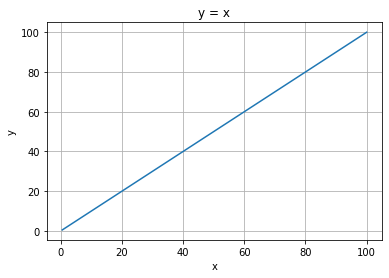

In [3]:
import matplotlib.pyplot as plt

x = [i * 0.5 for i in range(1, 201)]  
y = [i for i in x]  

f = plt.figure()
#f.set_figwidth(80)

plt.plot(x, y)  

#plt.xticks(x)
plt.title('y = x')  
plt.xlabel('x')  
plt.ylabel('y')
plt.grid(True)
plt.show()  


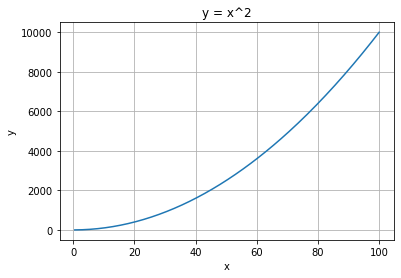

In [4]:
# plotting y = x^2

x = [i * 0.5 for i in range(1, 201)]  
y = [i**2 for i in x]  

f = plt.figure()
#f.set_figwidth(80)

plt.plot(x, y)  

#plt.xticks(x)
plt.title('y = x^2')  
plt.xlabel('x')  
plt.ylabel('y')
plt.grid(True)
plt.show()  


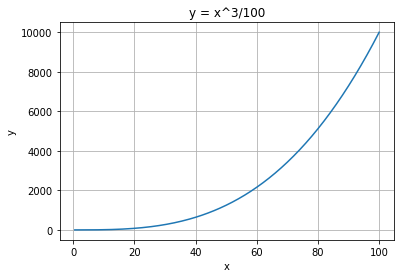

In [5]:
#plotting y = x^3/100

x = [i * 0.5 for i in range(1, 201)]  
y = [(i**3)/100 for i in x]  

f = plt.figure()
#f.set_figwidth(80)

plt.plot(x, y)  

#plt.xticks(x)
plt.title('y = x^3/100')  
plt.xlabel('x')  
plt.ylabel('y')
plt.grid(True)
plt.show()  



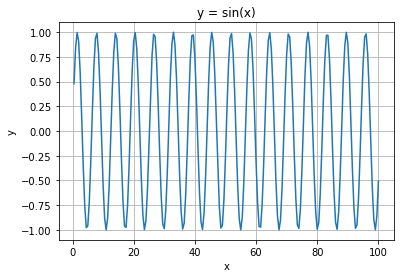

In [6]:
#plotting y = sin(x)

import math

x = [i * 0.5 for i in range(1, 201)]  
y = [math.sin(i) for i in x]  

f = plt.figure()
#f.set_figwidth(80)

plt.plot(x, y)  

#plt.xticks(x)
plt.title('y = sin(x)')  
plt.xlabel('x')  
plt.ylabel('y')
plt.grid(True)
plt.show()  



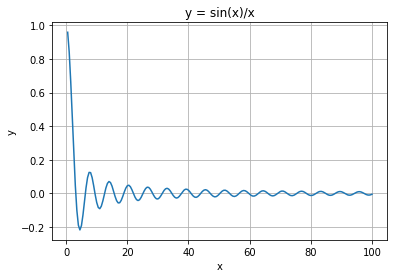

In [ ]:
#plotting y = sin(x)
import math

x = [i * 0.5 for i in range(1, 201)]  
y = [(math.sin(i))/i for i in x]  

f = plt.figure()
#f.set_figwidth(80)

plt.plot(x, y)  

#plt.xticks(x)
plt.title('y = sin(x)/x')  
plt.xlabel('x')  
plt.ylabel('y')
plt.grid(True)
plt.show()  



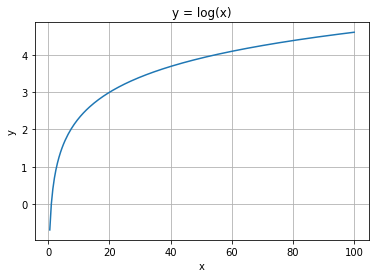

In [ ]:
#plotting y = sin(x)
import math

x = [i * 0.5 for i in range(1, 201)]  
y = [math.log(i) for i in x]  

f = plt.figure()
#f.set_figwidth(80)

plt.plot(x, y)  

#plt.xticks(x)
plt.title('y = log(x)')  
plt.xlabel('x')  
plt.ylabel('y')
plt.grid(True)
plt.show()  



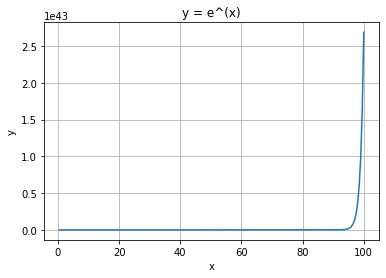

In [ ]:
#plotting y = e^(x)
import math
import numpy as np

x = [i * 0.5 for i in range(1, 201)] 
y = np.exp(x)  

f = plt.figure()
#f.set_figwidth(80)

plt.plot(x, y)  

# plt.xlim([0.5, 3])
# plt.ylim([0, 7])
#plt.xticks(x)
plt.title('y = e^(x)')  
plt.xlabel('x')  
plt.ylabel('y')
plt.grid(True)
plt.show()  



**Answer 10 :**


In [7]:
import numpy as np
s = np.random.uniform(1,2,(20,5))
print(s)

[[1.46763199 1.56037668 1.67501159 1.5368019  1.98195835]
 [1.02593897 1.1093577  1.67458524 1.39642766 1.39065487]
 [1.31605635 1.23884098 1.39410585 1.04728268 1.38622713]
 [1.2203078  1.17645278 1.82249009 1.84527971 1.28040014]
 [1.79181176 1.42151092 1.65960607 1.44131224 1.38846705]
 [1.29592641 1.27100438 1.06309138 1.16353454 1.64146239]
 [1.46297363 1.88050926 1.22522687 1.95162523 1.07173697]
 [1.97717348 1.38449359 1.09020692 1.08589715 1.27570097]
 [1.62762576 1.6317134  1.56340282 1.28312315 1.6035299 ]
 [1.54217599 1.91523573 1.6016998  1.02513622 1.41196372]
 [1.0954012  1.81909239 1.33467347 1.35787489 1.48555484]
 [1.23057799 1.02858176 1.07857105 1.9007712  1.02135928]
 [1.9868059  1.58671581 1.01446861 1.44160448 1.41229838]
 [1.88324733 1.15459723 1.18403366 1.13682191 1.54156461]
 [1.82003524 1.40847799 1.55412776 1.26366692 1.91881502]
 [1.72417706 1.99491109 1.4330822  1.01915684 1.86259405]
 [1.04994955 1.82374744 1.75865802 1.74661172 1.09688655]
 [1.30179611 1

In [8]:
import pandas as pd

s_pd = pd.DataFrame(s)
s_pd.columns =['a', 'b', 'c', 'd', 'e']
print(s_pd)

           a         b         c         d         e
0   1.467632  1.560377  1.675012  1.536802  1.981958
1   1.025939  1.109358  1.674585  1.396428  1.390655
2   1.316056  1.238841  1.394106  1.047283  1.386227
3   1.220308  1.176453  1.822490  1.845280  1.280400
4   1.791812  1.421511  1.659606  1.441312  1.388467
5   1.295926  1.271004  1.063091  1.163535  1.641462
6   1.462974  1.880509  1.225227  1.951625  1.071737
7   1.977173  1.384494  1.090207  1.085897  1.275701
8   1.627626  1.631713  1.563403  1.283123  1.603530
9   1.542176  1.915236  1.601700  1.025136  1.411964
10  1.095401  1.819092  1.334673  1.357875  1.485555
11  1.230578  1.028582  1.078571  1.900771  1.021359
12  1.986806  1.586716  1.014469  1.441604  1.412298
13  1.883247  1.154597  1.184034  1.136822  1.541565
14  1.820035  1.408478  1.554128  1.263667  1.918815
15  1.724177  1.994911  1.433082  1.019157  1.862594
16  1.049950  1.823747  1.758658  1.746612  1.096887
17  1.301796  1.700560  1.620778  1.628696  1.

In [15]:
print(s_pd.std(), s_pd.mean(axis=1))

a    0.305487
b    0.290454
c    0.251096
d    0.325600
e    0.272606
dtype: float64 0     1.644356
1     1.319393
2     1.276503
3     1.468986
4     1.540542
5     1.287004
6     1.518414
7     1.362694
8     1.541879
9     1.499242
10    1.418519
11    1.251972
12    1.488379
13    1.380053
14    1.593025
15    1.606784
16    1.495171
17    1.535821
18    1.461602
19    1.611598
dtype: float64


In [11]:
print("column with highest standard deviation: ",s_pd.std().idxmax())

column with highest standard deviation:  d


In [12]:
print("column with lowest mean: ", s_pd.mean(axis =1).idxmin())

column with lowest mean:  11


**Answer 11**

In [16]:
s_pd['f'] = s_pd['a']+s_pd['b']+s_pd['c']+s_pd['d']+s_pd['e']
s_pd

,a,b,c,d,e,f
0,1.467632,1.560377,1.675012,1.536802,1.981958,8.221781
1,1.025939,1.109358,1.674585,1.396428,1.390655,6.596964
2,1.316056,1.238841,1.394106,1.047283,1.386227,6.382513
3,1.220308,1.176453,1.822490,1.845280,1.280400,7.344931
4,1.791812,1.421511,1.659606,1.441312,1.388467,7.702708
5,1.295926,1.271004,1.063091,1.163535,1.641462,6.435019
6,1.462974,1.880509,1.225227,1.951625,1.071737,7.592072
7,1.977173,1.384494,1.090207,1.085897,1.275701,6.813472
8,1.627626,1.631713,1.563403,1.283123,1.603530,7.709395
9,1.542176,1.915236,1.601700,1.025136,1.411964,7.496211


In [17]:
s_pd['g'] = s_pd['f'].apply(lambda x:'LT8' if (x<8) else 'GT8') 

In [18]:
s_pd

,a,b,c,d,e,f,g
0,1.467632,1.560377,1.675012,1.536802,1.981958,8.221781,GT8
1,1.025939,1.109358,1.674585,1.396428,1.390655,6.596964,LT8
2,1.316056,1.238841,1.394106,1.047283,1.386227,6.382513,LT8
3,1.220308,1.176453,1.822490,1.845280,1.280400,7.344931,LT8
4,1.791812,1.421511,1.659606,1.441312,1.388467,7.702708,LT8
5,1.295926,1.271004,1.063091,1.163535,1.641462,6.435019,LT8
6,1.462974,1.880509,1.225227,1.951625,1.071737,7.592072,LT8
7,1.977173,1.384494,1.090207,1.085897,1.275701,6.813472,LT8
8,1.627626,1.631713,1.563403,1.283123,1.603530,7.709395,LT8
9,1.542176,1.915236,1.601700,1.025136,1.411964,7.496211,LT8


In [19]:
s_pd['g'].value_counts()['LT8']

17

In [22]:
print("standard deviation of 'g' with values LT8: ", s_pd[s_pd['g']=='LT8']['f'].std())

standard deviation of 'g' with values LT8:  0.5294583826456633


In [23]:
print("standard deviation of 'g' with values GT8: ", s_pd[s_pd['g']=='GT8']['f'].std())

standard deviation of 'g' with values GT8:  0.10222304884662686


**Answer 12:**

In [1]:
#broadcasting

import numpy as np

#scalar and array
array = np.array([3,4,5])
add = 8
bd = array+add
print("array after broadcasting: ",bd)
print()

#2d array and vector
array1 = np.array([[1, 2, 3], [4, 5, 6]])
add1 = x = np.array([[0, 2, 3]])
bd1 = array1+add1
print("2d array after broadcasting: ",bd1)

array after broadcasting:  [11 12 13]

2d array after broadcasting:  [[1 4 6]
 [4 7 9]]


**Answer 13:**

In [ ]:
import numpy as np

def func_argmin(arr):
  min_val = arr[0]
  min_index = 0
  
  # Iterate through the array
  for i, val in enumerate(arr):
    
    if val < min_val:
      min_val = val
      min_index = i
      
  return min_index

arr = np.array([[4, 2, 3],[9,7,3],[0,8,7]])
min_index = func_argmin(arr.flatten())
print("Min index by our function: ",min_index) 

Min index by our function:  6


In [ ]:
print("Min index by argmin function: ",np.argmin(arr)) 

Min index by argmin function:  6
